#PCA from Scratch


In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [10]:
!gdown 16elpyaPZhS63ibzIdetEjZhCO4FpVSZu

Downloading...
From: https://drive.google.com/uc?id=16elpyaPZhS63ibzIdetEjZhCO4FpVSZu
To: /content/pca_2d_data.csv
100% 778/778 [00:00<00:00, 2.09MB/s]


In [11]:
df = pd.read_csv('/content/pca_2d_data.csv')
df.head()

,f1,f2
0,2.038772,1.102760
1,0.869536,0.238030
2,1.795888,1.020364
3,0.103510,-0.513661
4,1.479554,0.750702


<Axes: xlabel='f1', ylabel='f2'>

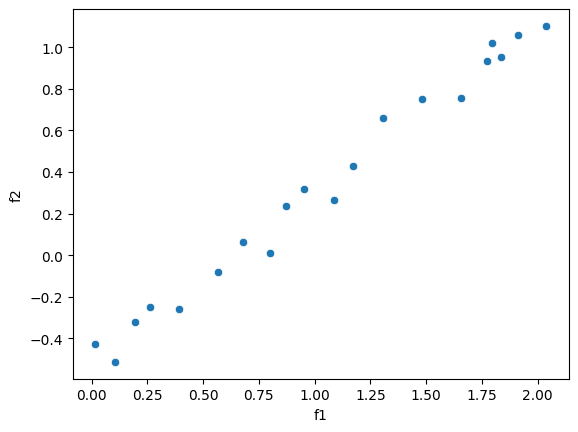

In [12]:
sns.scatterplot(data = df , x ='f1', y = 'f2')

####Scaling the data

In [13]:
x1_data = df['f1'].values
x2_data = df['f2'].values
x1_data

array([2.03877214, 0.86953564, 1.79588809, 0.10350957, 1.4795544 ,
       1.91275045, 0.19305904, 1.77099191, 1.65575113, 0.67715477,
       1.08863503, 1.17127964, 1.30506559, 0.56754921, 0.95345188,
       0.39344193, 0.01645223, 1.83739351, 0.26126185, 0.79959265])

In [14]:
x1_mean = np.mean(x1_data)
x2_mean = np.mean(x2_data)

x1_std = np.std(x1_data)
x2_std = np.std(x2_data)



In [15]:
x1_t = (x1_data - x1_mean) / x1_std
x2_t = (x2_data - x2_mean) / x2_std

In [34]:
data = np.zeros((len(x1_t),2))
data[: ,0] = x1_t
data[: ,1] = x2_t
pd.DataFrame(data, columns = ['f1' , 'f2'])

,f1,f2
0,1.545351,1.452459
1,-0.272039,-0.183554
2,1.167827,1.296572
3,-1.462703,-1.605704
4,0.676137,0.786388
5,1.349471,1.374209
6,-1.323513,-1.242173
7,1.129130,1.133523
8,0.950007,0.793678
9,-0.571064,-0.516018


In [19]:
data = np.zeros((len(x1_t),2))

In [20]:
data[: ,0] = x1_t
data[: ,1] = x2_t

In [ ]:
data

####Finding the co-variance

In [22]:
cov = np.matmul(data.T , data) / (len(data) -1 )
cov

array([[1.05263158, 1.04455543],
       [1.04455543, 1.05263158]])

In [23]:
eigenvalues, eigenvectors = np.linalg.eig(cov)


In [24]:
eigenvalues

array([2.09718701, 0.00807615])

In [ ]:
eigenvectors

In [25]:
X1 = eigenvectors[0].dot(data.T)
X1

array([ 0.06568469, -0.06256821, -0.09103631,  0.10111723, -0.07795922,
       -0.01749233, -0.05751616, -0.00310596,  0.11054149, -0.03892317,
        0.14218233,  0.01652969, -0.14911645,  0.03215013, -0.07610997,
        0.0820991 , -0.10974126,  0.04653675, -0.0770695 ,  0.16379714])

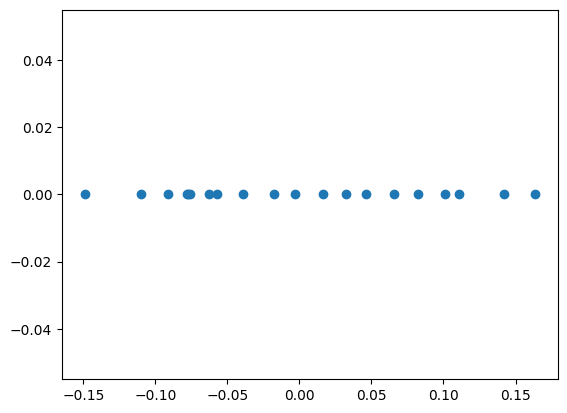

In [26]:
plt.figure()
plt.scatter(X1, np.zeros((len(data),)))
plt.show()

#PCA Semi scratch


In [ ]:
df.head()

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [ ]:
data_scaled

In [ ]:
cov = np.cov(data_scaled.T)

In [ ]:
eigenvalues , eigenvectors = np.linalg.eig(cov)
eigenvalues , eigenvectors


In [ ]:
X1 = eigenvectors[0].dot(data_scaled.T)
X1

#Using Library

In [ ]:
from sklearn import decomposition

In [ ]:
pca = decomposition.PCA(n_components =1)
pca.fit_transform(data_scaled)

In [ ]:
##Eigne vectors
pca.components_

In [ ]:
#Eigen_value
pca.explained_variance_

In [ ]:
#information loss
pca.explained_variance_ratio_

#PCA Case study (MNIST DATASET)

####Introduction to the MNIST Dataset:
- MNIST dataset: it's a classic dataset in machine learning, consisting of 28x28 grayscale images of handwritten digits (0 through 9).

<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/070/741/original/mnis.png?1712665123" width = 600>

- Every MNIST data point, every image, can be thought of as an array of numbers describing how dark each pixel is. For example, we might think of 1 as something like:

<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/070/742/original/one.png?1712665242" width = 600>

- Since each image has 28 by 28 pixels, we get a 28x28 array. We can flatten each array into a 28∗28=784 dimensional vector. Each component of the vector is a value between zero and one describing the intensity of the pixel. Thus, we generally think of MNIST as being a collection of 784-dimensional vectors.


**Note** : These are handwritten notes images, need to predict the original value
- But before that we have to reduce the dimensions


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
!gdown 1UZNOcb-bSL-aPPXWcPH4h4Kbx4G-bk9J

Downloading...
From: https://drive.google.com/uc?id=1UZNOcb-bSL-aPPXWcPH4h4Kbx4G-bk9J
To: /content/mnist_train.csv
100% 76.8M/76.8M [00:00<00:00, 86.8MB/s]


In [30]:
df = pd.read_csv('/content/mnist_train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.columns

In [31]:
# save the labels into a variable l.
l = df['label']

# Drop the label feature and store the pixel data in d.
d = df.drop("label",axis=1)

In [ ]:
display(l.shape)
display(d.shape)

In [ ]:
# display or plot a number.
plt.figure(figsize=(7,7))
idx = 99

grid_data = d.iloc[idx].values.reshape(28, 28)  # reshape from 1d to 2d pixel array
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

print(l[idx])

In [5]:
from sklearn import decomposition

pca = decomposition.PCA(n_components = 20)
pca.fit_transform(d)

NameError: name 'd' is not defined

In [ ]:
#information loss
np.sum(pca.explained_variance_ratio_)
#64% of the variance of the data is explained by the algorithm

#Applying T SNE

In [35]:
d = d.iloc[100:,]

In [ ]:
from sklearn.manifold import TSNE
z= TSNE(n_components = 2 , random_state=0 , perplexity=25)
z.fit_transform(d)

In [1]:
from sklearn import datasets

digits = datasets.load_digits()

X=digits.data
print(X.shape)

(1797, 64)


###Visualizing the data

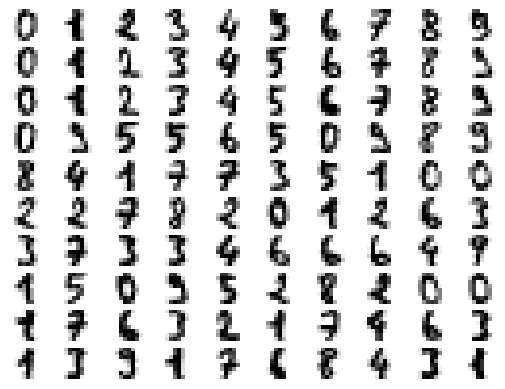

In [2]:
import matplotlib.pyplot as plt

plt.set_cmap('binary') # set the colourmap to grayscale white to black

for i in range(10):
  for j in range(10):
   ax = plt.subplot(10,10,1+10*i+j)
   ax.axis('off')
   ax.matshow(digits.images[10*i+j])

plt.show()
plt.close()

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)

X_stand = scaler.transform(X)

###Implementing PCA

In [7]:
from sklearn import decomposition
pca = decomposition.PCA(n_components = 2)

X_embedded = pca.fit_transform(X_stand)


print(X_embedded.shape)

(1797, 2)


<Figure size 640x480 with 0 Axes>

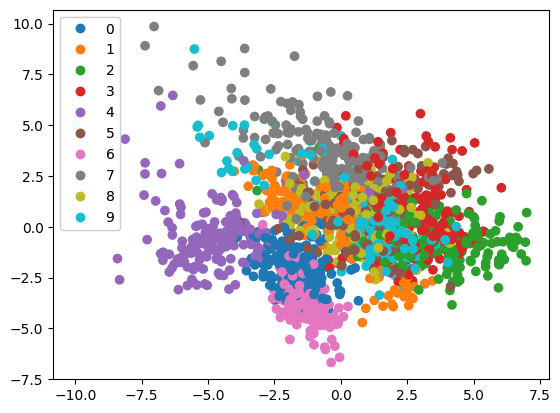

In [8]:
plt.set_cmap('tab10')

fig, ax = plt.subplots()
scatter = ax.scatter(X_embedded[:,0],X_embedded[:,1],c=digits.target)

legend = ax.legend(*scatter.legend_elements(),loc="upper left")
ax.add_artist(legend)

plt.show()
plt.close()

###Implementing t-SNE

In [9]:
from sklearn.manifold import TSNE

X_embedded = TSNE().fit_transform(X)

print(X_embedded.shape)

(1797, 2)


<Figure size 640x480 with 0 Axes>

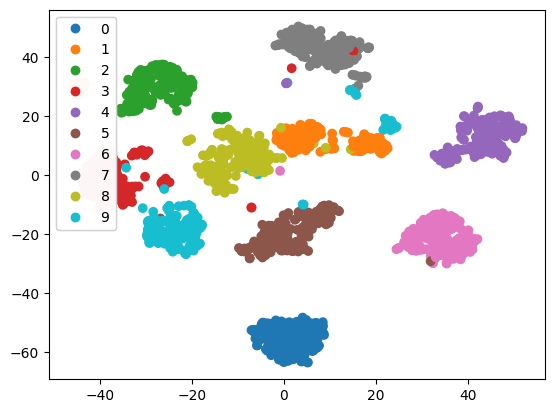

In [10]:
plt.set_cmap('tab10')

fig, ax = plt.subplots()
scatter = ax.scatter(X_embedded[:,0],X_embedded[:,1],c=digits.target)

legend = ax.legend(*scatter.legend_elements(),loc="upper left")
ax.add_artist(legend)

plt.show()
plt.close()